# Exploratory Data Analysis

### Project : Global Trend Analysis

### Problem Statement : 
##### The modern world is shaped by complex dynamics in population, health, and economics, making understanding these trends vital for informed policy-making. GlobalTrends, a leading analytics firm, is dedicated to deciphering these patterns through a comprehensive analysis of the Gapminder dataset. Your role in this project is to conduct an in-depth Exploratory Data Analysis (EDA), uncovering the intricate relationships between demographic changes, economic development, and health advancements over recent decades.


In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
# loading the dataset
data = pd.read_csv("C:/Users/HP/Downloads/gapminder_full.csv")
data

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [3]:
data.shape     # Give the count of rows and columns in dataset.

(1704, 6)

In [4]:
shape = (1704,6)
print(f" Total rows in dataset : {shape[0]}\n Total columns in dataset : {shape[1]}")

 Total rows in dataset : 1704
 Total columns in dataset : 6


In [5]:
data.dtypes     # Give the datatypes of each columns in the datasets.

country        object
year            int64
population      int64
continent      object
life_exp      float64
gdp_cap       float64
dtype: object

In [6]:
data.isna().sum()    # checking for the null values if any present in dataset

country       0
year          0
population    0
continent     0
life_exp      0
gdp_cap       0
dtype: int64

### Objective Question : 1 
##### Load the dataset and display the first few rows. How many countries does the dataset have?

In [7]:
countries = data['country'].nunique()
print(f"Total numbers of unique countries present in dataset is : {countries} ")

Total numbers of unique countries present in dataset is : 142 


In [8]:
countries_list = data['country'].unique()
print(f"Total numbers of unique countries present in dataset is : \n\n {countries_list} ")

Total numbers of unique countries present in dataset is : 

 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Australia'
 'Austria' 'Bahrain' 'Bangladesh' 'Belgium' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Finland'
 'France' 'Gabon' 'Gambia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mex

### Objective Question : 2
##### Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values.

In [9]:
# Creating the pivot table 
pivot_table = pd.pivot_table (
data,
    values="life_exp",
    index="continent",
    columns="year",
    aggfunc="mean"
)
print(f"The pivot_table is :\n\n {pivot_table}")
#print(tabulate(pivot_table,headers = 'keys', tablefmt = 'fancy_grid'))

The pivot_table is :

 year            1952       1957       1962       1967       1972       1977  \
continent                                                                     
Africa     39.135500  41.266346  43.319442  45.334538  47.450942  49.580423   
Americas   53.279840  55.960280  58.398760  60.410920  62.394920  64.391560   
Asia       46.314394  49.318544  51.563223  54.663640  57.319269  59.610556   
Europe     64.408500  66.703067  68.539233  69.737600  70.775033  71.937767   
Oceania    69.255000  70.295000  71.085000  71.310000  71.910000  72.855000   

year            1982       1987       1992       1997       2002       2007  
continent                                                                    
Africa     51.592865  53.344788  53.629577  53.598269  53.325231  54.806038  
Americas   66.228840  68.090720  69.568360  71.150480  72.422040  73.608120  
Asia       62.617939  64.851182  66.537212  68.020515  69.233879  70.728485  
Europe     72.806400  73.642167  

### Objective Question : 3  
##### Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [10]:
# filtering the data for year = "2007"
data_2007 = data[data["year"] == 2007]

In [11]:
# Finding the GDP_75th_Percentile
GDP_75th_Percentile = data_2007['gdp_cap'].quantile(0.75)

In [12]:
# After finding the GDP_75th_Percentile by using comparison operator we can get the high_gdp_countries
high_gdp_countries = data_2007[data_2007['gdp_cap'] > GDP_75th_Percentile]['country']
c = high_gdp_countries.tolist()
print(f"Countries with GDP per capita higher than the 75th percentile in 2007 : \n\n  {c}")

Countries with GDP per capita higher than the 75th percentile in 2007 : 

  ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong, China', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Puerto Rico', 'Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'United Kingdom', 'United States']


### Objective Question : 4 
##### Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

In [13]:
# Defining the bin labels
exp_labels = ["Low","Medium","High","Very High"]
data['life_exp_range'] = pd.cut(data['life_exp'],bins=4,labels = exp_labels,include_lowest = True)

In [14]:
data.head(15)

,country,year,population,continent,life_exp,gdp_cap,life_exp_range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low
5,Afghanistan,1977,14880372,Asia,38.438,786.113360,Medium
6,Afghanistan,1982,12881816,Asia,39.854,978.011439,Medium
7,Afghanistan,1987,13867957,Asia,40.822,852.395945,Medium
8,Afghanistan,1992,16317921,Asia,41.674,649.341395,Medium
9,Afghanistan,1997,22227415,Asia,41.763,635.341351,Medium


### Objective Question : 5
##### Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.

In [15]:
top_5_countries = data_2007.sort_values(by='gdp_cap',ascending=False).head(5)
print(f"Top 5 countries with the highest GDP per capita in 2007 \n\n {top_5_countries}")

Top 5 countries with the highest GDP per capita in 2007 

             country  year  population continent  life_exp      gdp_cap
1151         Norway  2007     4627926    Europe    80.196  49357.19017
863          Kuwait  2007     2505559      Asia    77.588  47306.98978
1367      Singapore  2007     4553009      Asia    79.972  47143.17964
1619  United States  2007   301139947  Americas    78.242  42951.65309
755         Ireland  2007     4109086    Europe    78.885  40675.99635


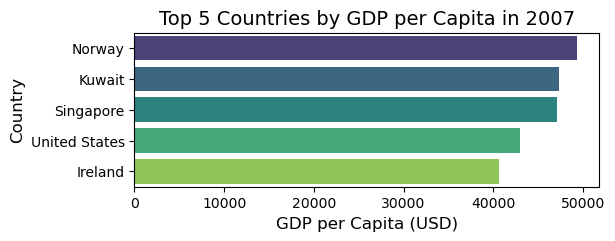

In [16]:
# Data visualization / chart & graph
# seaborn
plt.figure(figsize=(6, 2))
sn.barplot(x='gdp_cap', y='country', data=top_5_countries, palette='viridis')
# matplotlib
plt.xlabel('GDP per Capita (USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 5 Countries by GDP per Capita in 2007', fontsize=14)
plt.show()

### Objective Question : 6
##### Find all country names that start with "I" and end with "a" using regex.

In [17]:
# Use regex to filter country names
pattern = r"^I.*a$"  # Starts with 'I' and ends with 'a'
matching_countries = data[data['country'].str.contains(pattern, regex=True)]

print("Countries that start with 'I' and end with 'a':")
print(matching_countries['country'].tolist())

Countries that start with 'I' and end with 'a':
['India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia', 'Indonesia']


### Objective Question : 7
##### Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

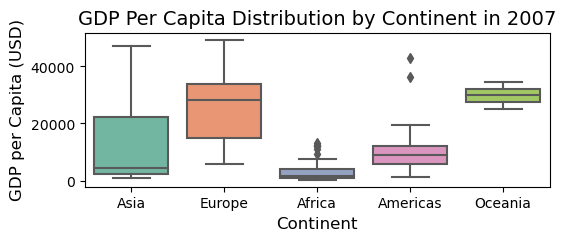

In [18]:
# Creating the boxplot using seaborn
plt.figure(figsize=(6, 2))
sn.boxplot(x='continent', y='gdp_cap', data=data_2007, palette='Set2')

# Adding titles and labels using matplotlib
plt.title('GDP Per Capita Distribution by Continent in 2007', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('GDP per Capita (USD)', fontsize=12)
plt.show()

### Objective Question : 8
##### Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.

In [19]:
# Filter for 2007 and life expectancy over 80
high_life_exp = data[(data['year'] == 2007) & (data['life_exp'] > 80)]
print(high_life_exp[['country', 'continent']])

               country continent
71           Australia   Oceania
251             Canada  Americas
539             France    Europe
671   Hong Kong, China      Asia
695            Iceland    Europe
767             Israel      Asia
779              Italy    Europe
803              Japan      Asia
1103       New Zealand   Oceania
1151            Norway    Europe
1427             Spain    Europe
1475            Sweden    Europe
1487       Switzerland    Europe


### Objective Question : 09
##### Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).

In [20]:
# Convert 'year' to datetime and extract the decade
data['year'] = pd.to_datetime(data['year'], format='%Y')
data['Decade'] = (data['year'].dt.year // 10 * 10).astype(str) + 's'

print(data[['country', 'year', 'Decade']])

          country       year Decade
0     Afghanistan 1952-01-01  1950s
1     Afghanistan 1957-01-01  1950s
2     Afghanistan 1962-01-01  1960s
3     Afghanistan 1967-01-01  1960s
4     Afghanistan 1972-01-01  1970s
...           ...        ...    ...
1699     Zimbabwe 1987-01-01  1980s
1700     Zimbabwe 1992-01-01  1990s
1701     Zimbabwe 1997-01-01  1990s
1702     Zimbabwe 2002-01-01  2000s
1703     Zimbabwe 2007-01-01  2000s

[1704 rows x 3 columns]


### Objective Question : 10
##### Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.

            population  life_exp   gdp_cap
population    1.000000  0.064955 -0.025600
life_exp      0.064955  1.000000  0.583706
gdp_cap      -0.025600  0.583706  1.000000


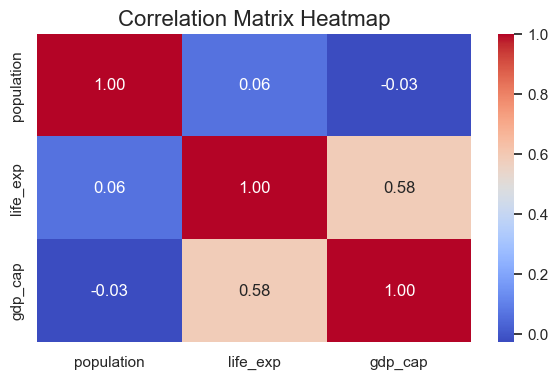

In [21]:
# Select relevant columns
columns_of_interest = ["population", "life_exp", "gdp_cap"]
correlation_matrix = data[columns_of_interest].corr()

# Display the correlation matrix (optional)
print(correlation_matrix)

# Creating a heatmap
sn.set(style="whitegrid")
plt.figure(figsize=(7, 4))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

### Objective Question : 11
##### How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.

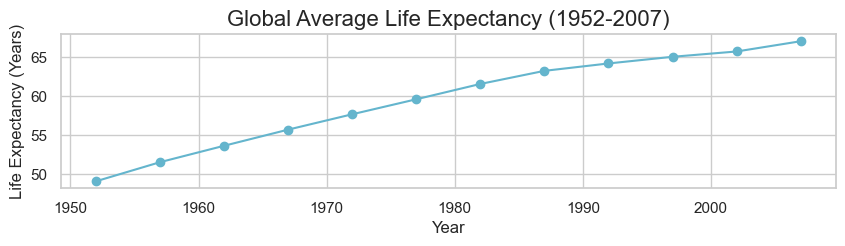

In [22]:
# Calculate global average life expectancy by year
avg_life_exp = data.groupby("year")["life_exp"].mean()

# Plot the line graph
plt.figure(figsize=(10, 2))
plt.plot(avg_life_exp.index, avg_life_exp.values, marker="o", linestyle="-", color="c")
plt.title("Global Average Life Expectancy (1952-2007)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)
plt.grid(True)
plt.show()

#### Subjective Question : Discuss the various reasons that could have contributed to the change.
##### The rise in global life expectancy (1952–2007) is due to:

###### 1. Medical Advancements: Vaccines, antibiotics, and better treatments reduced mortality and prolonged lives.
###### 2. Public Health Improvements: Clean water, sanitation, and reduced malnutrition boosted health outcomes.
###### 3. Economic Growth: Higher incomes improved healthcare, nutrition, and living standards.
###### 4. Technological Progress: Innovations in agriculture and transportation reduced food scarcity and improved healthcare access.
###### 5. Global Efforts: WHO, UNICEF, and others eradicated diseases and raised health awareness.
###### 6. Peace and Stability: Reduced conflicts after WWII saved lives and promoted development. '''



### Objective Question : 12
##### For the year 2007, analyze the relationship between life expectancy and GDP per capita. 
##### Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot.

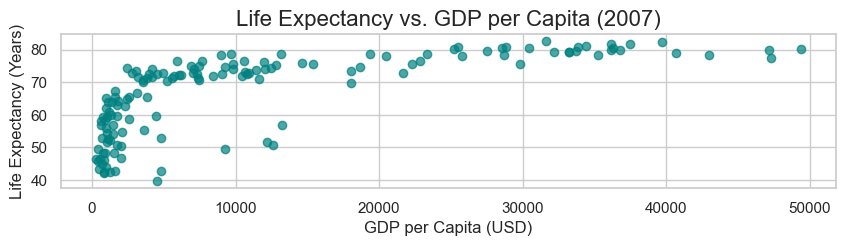

In [23]:
# Create scatter plot
plt.figure(figsize=(10, 2))
plt.scatter(data_2007["gdp_cap"], data_2007["life_exp"], alpha=0.7, color="teal")
plt.title("Life Expectancy vs. GDP per Capita (2007)", fontsize=16)
plt.xlabel("GDP per Capita (USD)", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)
plt.grid(True)
plt.show()

#### Subjective Question: Is there a noticeable trend or correlation?
###### 1. The scatter plot will likely show a positive correlation between GDP per capita and life expectancy.
###### 2. Wealthier countries (higher GDP per capita) tend to have better healthcare systems, higher living standards, and longer life expectancies.
###### 3. However, the relationship may plateau at higher GDP levels, where gains in GDP have diminishing effects on life expectancy.


### Objective Question : 13
##### Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.

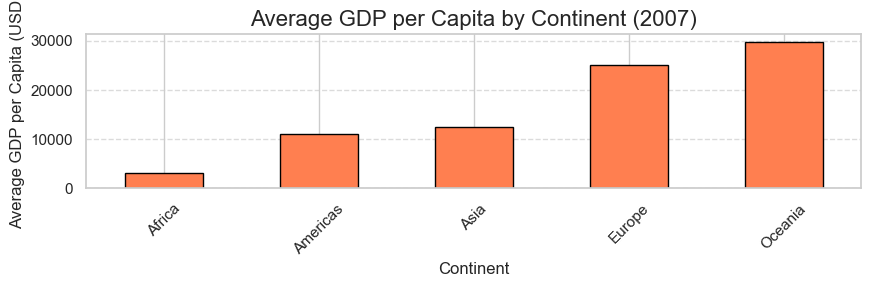

In [24]:
# Calculate average GDP per capita by continent for 2007
avg_gdp_continent = data_2007.groupby("continent")["gdp_cap"].mean()

# Create bar chart
plt.figure(figsize=(10, 2))
avg_gdp_continent.sort_values().plot(kind="bar", color="coral", edgecolor="black")
plt.title("Average GDP per Capita by Continent (2007)", fontsize=16)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Average GDP per Capita (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Subjective Question:  Why is the average GDP per capita for Oceania higher than the Americas even though the Americas have more countries?
###### 1. Oceania has a small number of countries, with high-income nations like Australia and New Zealand dominating the region's GDP statistics.
###### 2.  In contrast, the Americas include both wealthy countries (e.g., USA, Canada) and many low-income nations (e.g., Haiti, Nicaragua). This broader range lowers the average GDP per capita for the Americas.
###### 3. Smaller population disparities in Oceania also mean that wealthier nations disproportionately influence the average GDP per capita.

### Objective Question : 14
##### Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.
##### Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.
##### Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries


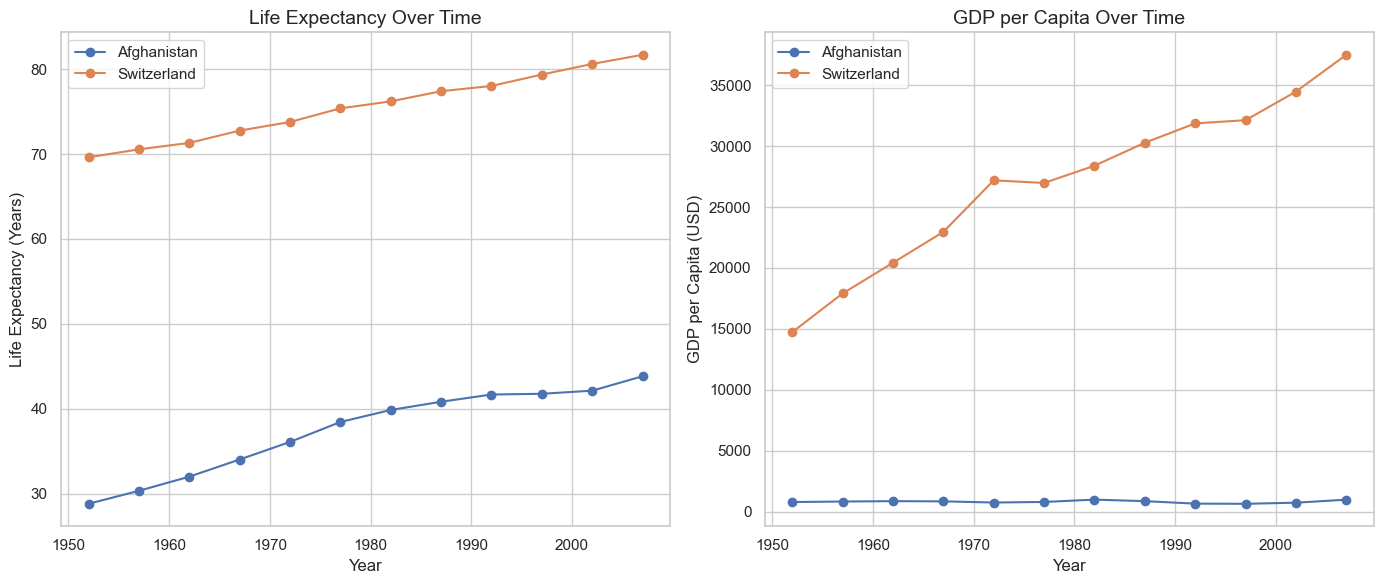

In [25]:
# Filter data for Afghanistan and Switzerland
data_af_sw = data[data["country"].isin(["Afghanistan", "Switzerland"])]

# Plot trends for life expectancy and GDP per capita
metrics = ["life_exp", "gdp_cap"]
titles = ["Life Expectancy Over Time", "GDP per Capita Over Time"]
labels = ["Life Expectancy (Years)", "GDP per Capita (USD)"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, metric in enumerate(metrics):
    for country in ["Afghanistan", "Switzerland"]:
        country_data = data_af_sw[data_af_sw["country"] == country]
        axes[i].plot(country_data["year"], country_data[metric], marker="o", label=country)
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel("Year", fontsize=12)
    axes[i].set_ylabel(labels[i], fontsize=12)
    axes[i].legend()

plt.tight_layout()
plt.show()

#### Subjective Question: What differences do you observe in terms of life expectancy and economic development? How might the stability or instability of a country influence these key metrics over time? Analyze the data through these visualizations and discuss your inferences.
##### Observations:
##### 1. Life Expectancy:

###### In 2007, Switzerland’s life expectancy is significantly higher than Afghanistan’s.
###### Over the years, Afghanistan shows slow improvements, but instability due to conflict causes stagnation and occasional declines.
###### Switzerland consistently shows high life expectancy due to its advanced healthcare system and stable environment.

##### 2. GDP per Capita:

###### Switzerland’s GDP per capita in 2007 is much higher than Afghanistan’s, reflecting its developed economy.
###### Afghanistan has remained economically underdeveloped, with minimal growth due to prolonged conflicts and lack of infrastructure.
###### Switzerland shows steady GDP growth, reflecting political stability and a strong global economic position.

##### 3. Inferences:
###### Impact of Stability: Political and economic stability in Switzerland fosters long-term investments in healthcare, education, and infrastructure, leading to sustained improvements in life expectancy and GDP.
###### Impact of Instability: Afghanistan’s history of conflicts has hindered economic growth and healthcare development, resulting in lower life expectancy and stagnating GDP.
